# Basics of logistic regression

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [3]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

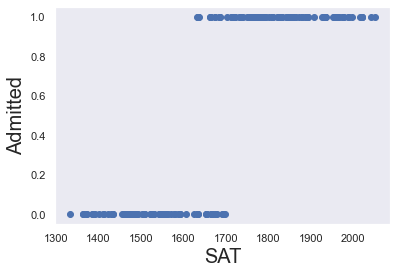

In [6]:
plt.scatter(x1,y,color='C0')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### Plot with a regression line

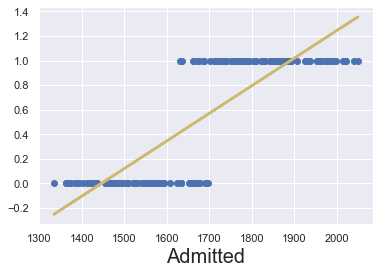

In [7]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()

plt.scatter(x1, y, color='C0')
y_hat = x1*results_line.params[1] + results_line.params[0]

plt.plot(x1,y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize= 20)
plt.xlabel('Admitted', fontsize= 20)

plt.show()

<p style="color:##001e8a"><b>The first assumption of the OLS is <b style="color:#ff6363">linearity</b>, but as we can see, our data is <b style="color:#ff6363">non-linear</b>, so we must use another way to deal with <b style="color:#ff6363">non-linear</b> patterns. </b></p>

## Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


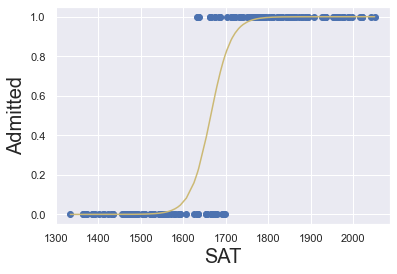

In [8]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [9]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.7992
Time:                        17:51:32   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<h3>Interpretation new concepts</h3>
<ul>
    <li><h4 style="color:##001e8a"><b style="color:#ff6363">Likelihood function:</b> a function which estimate how likely it is that the model describes the real underlying relationship of the variable</h4>
    <li><h4 style="color:##001e8a"><b style="color:#ff6363">Method MLE (Maximum Likelihood Estimation): </b> the computer is going through different values, until it finds a model, for which the likelihood is the highest.<b style="color:#ff6363">The bigger the likelihood function, the higher the probability that our model is correct!</b> </h4></li>
     <li><h4 style="color:##001e8a"><b style="color:#ff6363">Log-likelihood:</b> is a logarithmic transformation of the likelihood function. Because logarithms are strictly increasing functions, maximizing the likelihood is equivalent to maximizing the log-likelihood. </h4></li>
    <li><h4 style="color:##001e8a"><b style="color:#ff6363">LL-Null (Log-likelihood Null):</b> is the log likelihood of a model which<b style="color:#ff6363"> has no independent variables</b>. <br/>  
        -> Y = b0*1 (No X variables) (See below examples)
        </h4>
    </li>
       <li><h4 style="color:##001e8a"><b style="color:#ff6363">LLR p-value (Log-likelihood ratio):</b> measure if our model is statistically different from LL-null (aka useless model) <br/>  
        </h4>
    </li>
    <li><h4 style="color:##001e8a"><b style="color:#ff6363">Pseudo R-square:</b> a good Pseudo R-squared is somewhere between 0.2 and 0.4 <br/>  
        </h4>
    </li></ul>

In [10]:
# LL-Null Example

x0 = np.ones(168)
reg_test_log = sm.Logit(y,x0)
results_log_test = reg_test_log.fit()
results_log_test.summary()

#We can see there are 2 same LL-Null

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:               7.410e-11
Time:                        18:55:29   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [11]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.7992
Time:                        20:13:08   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Interpretation Logit regression
<h4 style="color:##001e8a">log(P/(1-P)) = log(odds) = -69.91 + 0.042*SAT</h4>
<h4 style="color:##001e8a">Get 2 SAT for examples and call SAT1 and SAT2, we have:
<br/>
    <b style="color:#ff6363">log(odds2) = -69.91 + 0.042*SAT2</b> 
    <br/>
    <b style="color:#ff6363">log(odds1) = -69.91 + 0.042*SAT1</b> 
       <br/>
    <b> -> log(odds2)-log(odds1) = log(odds2/odds1) = 0.042*(SAT2 - SAT1)</b> 
  </h4>
  <h4 style="color:##001e8a">
    <b> Difference of 1 unit of SAT: <b style="color:#ff6363">odds2 = 104.2% * odds1 </b>(exponential of 2 sieds)</b>
        <br/>
    <b>Explain: When the SAT score increases by 1, the odds of admittance increase by 4.2%</b>
        <br/>
    <b> Difference of 10 units of SAT: <b style="color:#ff6363">odds2 = 152% * odds1 </b></b>
        <br/>
    <b>Explain: 'Odds2' are 52% higher than 'Odds1'</b>
        <br/>
    <b> Difference of 100units of SAT: <b style="color:#ff6363">odds2 = 6669% * odds1 </b></b>
        <br/>
    <b>Explain: 'Odds2' are <b style="color:#ff6363">66 times</b> higher than 'Odds1'</b>
        <br/>
</h4>